#### Notebook destinado ao tratamento da base de dados para utilizar na Visualização

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
df = pd.read_csv('olympic_results.csv')

In [43]:
df_ouro = df[df['medal_type'] == 'GOLD'].copy()

In [ ]:
# extraindo o ano de cada olimpiada
df_ouro['ano'] = df_ouro['slug_game'].str[-4:].astype(int)

In [46]:
df_atletismo_tempo =  df_ouro[(df_ouro['discipline_title'] == 'Athletics') & (df_ouro['value_type'] == 'TIME')]
df_atletismo_distancia =  df_ouro[(df_ouro['discipline_title'] == 'Athletics') & (df_ouro['value_type'] == 'DISTANCE')]
df_peso =  df_ouro[df_ouro['discipline_title'] == 'Weightlifting']

In [48]:
df_atletismo_tempo['event_title'].unique()

array(["Women's 1500m", '4 x 400m Relay Mixed',
       "Women's 3000m Steeplechase", "Women's 4 x 100m Relay",
       "Women's 5000m", "Men's 110m Hurdles", "Men's 200m",
       "Women's 400m", "Men's 800m", "Women's 100m Hurdles",
       "Women's 4 x 400m Relay", "Men's 3000m Steeplechase",
       "Women's 800m", "Women's 400m Hurdles", "Men's 400m Hurdles",
       "Men's 4 x 100m Relay", "Women's 200m", "Men's 4 x 400m Relay",
       "Men's 400m", "Men's 1500m", "Men's 5000m", '1500m women',
       '800m men', '100m men', '50km walk men', '4x400m relay women',
       '3000m steeplechase women', 'marathon women', '100m hurdles women',
       '1500m men', '10000m women', '200m men', '5000m women',
       'marathon men', '400m hurdles men', '4x400m relay men',
       '4x100m relay women', '400m men', '100m women', '4x100m relay men',
       '20km walk men', '110m hurdles men', '400m hurdles women',
       '3000m steeplechase men', '200m women', '20km race walk women',
       '5000m men'

In [80]:
df_atletismo_tempo[df_atletismo_tempo['event_title'] == '800m women']['value_unit'].unique()

array(['115280', '117230', '114870', '116380', '116150', '117730',
       '115540', '116100', '117600', '113500', '114940', '118550',
       '120900', '121100', '124300', '136800'], dtype=object)

C:\Users\cguil\AppData\Local\Temp\ipykernel_12548\1414055687.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_corridas['tempo_segundos'] = df_corridas.groupby('event_title')['tempo_segundos'].fillna(method='ffill')


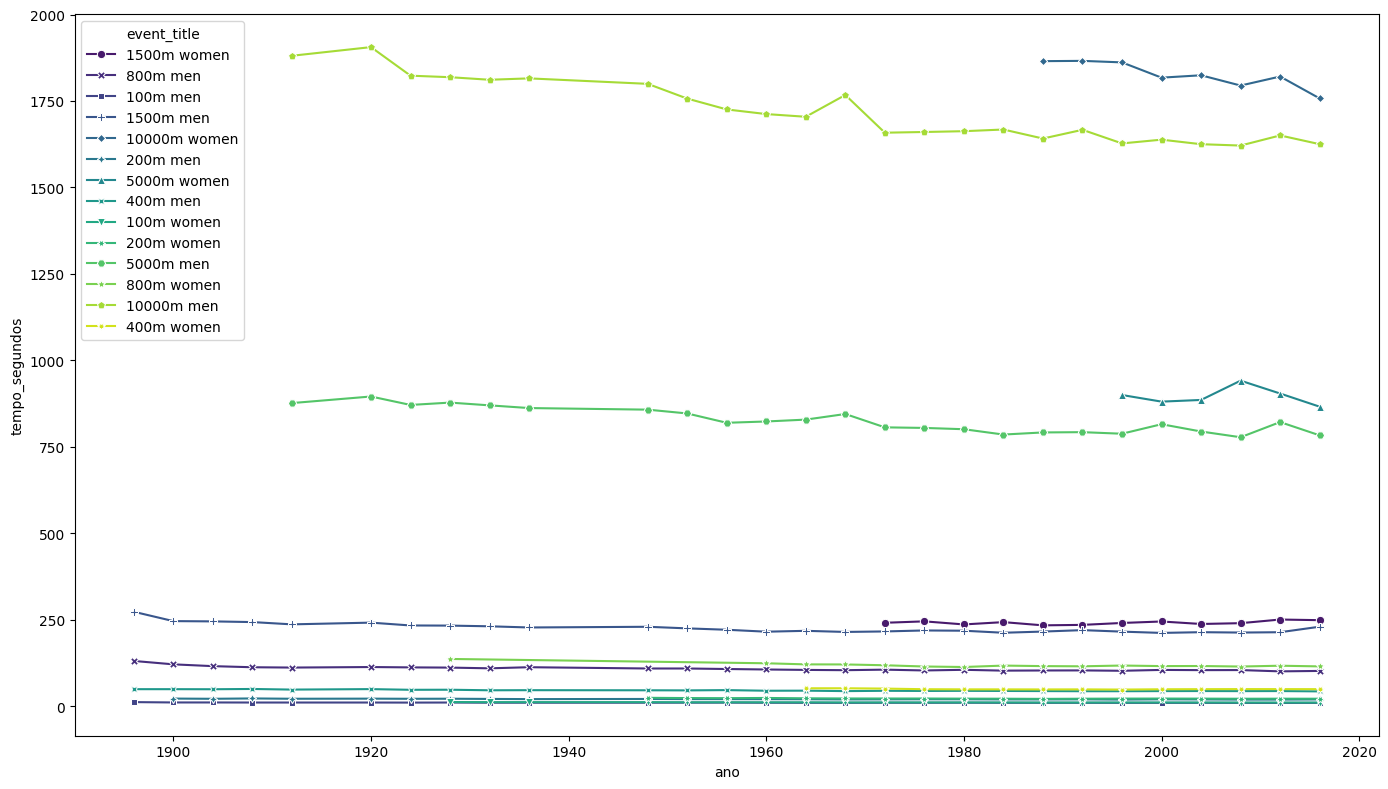

In [ ]:
provas_corrida = ["100m men", "100m women", "200m men", "200m women", "400m men", "400m women", "800m men", "800m women", "1500m men", "1500m women", "5000m men", "5000m women", "10000m men", "10000m women"]
df_corridas = df_atletismo_tempo[df_atletismo_tempo['event_title'].isin(provas_corrida)].copy()

def converter_tempo_men(valor):
    try:
        return float(valor) / 1000 
    except (ValueError, TypeError):
        return np.nan

df_corridas['tempo_segundos'] = df_corridas['value_unit'].apply(converter_tempo_men)
df_corridas['tempo_segundos'] = df_corridas.groupby('event_title')['tempo_segundos'].fillna(method='ffill')

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_corridas,
    x='ano',
    y='tempo_segundos',
    hue='event_title',  
    style='event_title', 
    markers=True,     
    dashes=False,      
    errorbar=None,         
    palette='viridis'   
)

plt.tight_layout()
plt.show()